In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

df = pd.read_csv('/content/airbnb_v2.csv')

df = df[['id','name','country','rating','reviews','host_id','price']]

df.head()

,id,name,country,rating,reviews,host_id,price
0,49849504,Perla bungalov,Turkey,4.71,64,357334205.0,8078
1,50891766,Authentic Beach Architect Sheltered Villa with...,Turkey,New,0,386223873.0,4665
2,50699164,cottages sataplia,Georgia,4.85,68,409690853.0,5991
3,49871422,Sapanca Breathable Bungalow,Turkey,5.0,13,401873242.0,11339
4,51245886,Bungalov Ev 2,Turkey,New,0,414884116.0,6673


### 1. Data Exploration & Cleaning

##### 1.1) Cleaning Ratings

In [ ]:
df['rating'] = df['rating'].replace('New','0.0').astype('float')

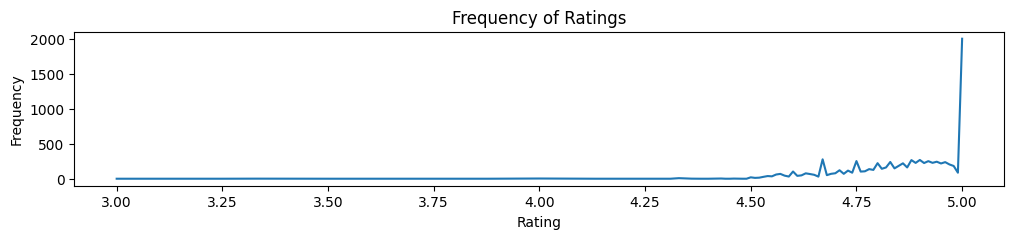

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate value counts
rating_counts = df[df['rating'] != 0]['rating'].value_counts().sort_index()

# Set the figure size (width, height)
plt.figure(figsize=(12, 2))  # Adjust the width (12) as needed

# Create the area chart
sns.lineplot(x=rating_counts.index, y=rating_counts.values)
plt.fill_between(rating_counts.index, rating_counts.values, alpha=0.3)

plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.title("Frequency of Ratings")
plt.show()

In [ ]:
df[df['rating']!= 0]['rating'].mean()

4.857475195517684

##### 1.2) Cleaning Reviews

In [ ]:
df['reviews'] = df['reviews'].str.replace(',','').astype(int)

##### 1.3) Create Rating Filter

In [ ]:
df['rating_filter'] = df['rating']  * df['reviews']

##### 1.4) Cleaning Country

In [ ]:
df['country'] = df['country'].str.strip()

In [ ]:
df

,id,name,country,rating,reviews,host_id,price,rating_filter
0,49849504,Perla bungalov,Turkey,4.71,64,357334205.0,8078,301.44
1,50891766,Authentic Beach Architect Sheltered Villa with...,Turkey,0.00,0,386223873.0,4665,0.00
2,50699164,cottages sataplia,Georgia,4.85,68,409690853.0,5991,329.80
3,49871422,Sapanca Breathable Bungalow,Turkey,5.00,13,401873242.0,11339,65.00
4,51245886,Bungalov Ev 2,Turkey,0.00,0,414884116.0,6673,0.00
...,...,...,...,...,...,...,...,...
12800,44697740,"Brown Dome House No. 3, full of healing",South Korea,4.94,16,161552316.0,4288,79.04
12801,29975283,Bubble Hotel Ubud with Bathtub under the Sky,Indonesia,4.67,6,118954227.0,15200,28.02
12802,32977697,Paradise Eco Hub,Uganda,4.67,3,175214568.0,9103,14.01
12803,8006146,WisDOME - Mentigi Bay Village - Gilis - Lombok,Indonesia,4.86,7,718423.0,42262,34.02


In [ ]:
from tqdm import tqdm

In [ ]:
for country in tqdm(df['country'].unique()):

  df[df['country'] == country].sort_values('rating_filter',ascending = False).head(10).to_csv('Airbnb/' + country + '.csv', index = False)

100%|██████████| 119/119 [00:00<00:00, 367.56it/s]


In [ ]:
pd.read_csv('/content/Airbnb/Guadeloupe.csv')

,id,name,country,rating,reviews,host_id,price,rating_filter
0,16836971,Oli's bed - Guestroom,Guadeloupe,4.76,50,110842827.0,1985,238.00
1,23320299,Riva - Luxury villa on a private island 4 pers...,Guadeloupe,4.85,41,173665110.0,23812,198.85


In [ ]:
df[(df['country'] == 'India') & (df['price'] < 2000)].sort_values('rating_filter',ascending = False).head(10)

,id,name,country,rating,reviews,host_id,price,rating_filter
3174,13380582,Pearl of Taj Home Stay Near Taj Mahal,India,4.70,230,75560237.0,1849,1081.00
6604,28137569,Pearl House,India,4.98,201,212541802.0,1826,1000.98
704,32436639,Gorgeous home stay 400 meters from Model beach,India,4.91,162,243643369.0,1769,795.42
6109,14721201,Spacious & comfortable room in South Delhi,India,4.65,147,91628693.0,1205,683.55
3073,23734078,Homestay,India,4.85,135,96967176.0,1326,654.75
10187,23368806,Shanti Van,India,4.62,134,169614713.0,1512,619.08
7582,8585802,"Ultra Luxurious Flat with kitchen, wifi & parking",India,4.56,131,3154255.0,1901,597.36
5999,2357841,Grand Sunset Condos - III,India,4.76,124,11643684.0,1695,590.24
2371,17192836,HouseBoat In Calm Dal Lake Room2(ROOM 1 SEE BE...,India,4.87,121,78099432.0,1712,589.27
6203,8162917,Yoga Padma Rishikesh House,India,4.74,109,43085702.0,980,516.66


In [ ]:
pd.read_csv('/content/India.csv')

,id,name,country,rating,reviews,host_id,price,rating_filter
0,14999327,The Artist's Studio ★Central Area★,India,4.86,337,34816822.0,2967,1637.82
1,9071915,Snug 3 Bedroom Suite WFH,India,4.79,306,18846164.0,6240,1465.74
2,16105121,"The Cloudberry, Cozy 2BHK surreal views, Shimla",India,4.83,300,46214533.0,8962,1449.00
3,2750166,An Eco yoga Habitat,India,4.76,251,14070177.0,3906,1194.76
4,7251420,Luxury Studio in North Goa (Only Couples),India,4.60,256,35702468.0,2648,1177.60
5,12034875,Farm house stay-swimming pool near Hyderabad,India,4.75,246,62124838.0,5820,1168.50
6,21414789,Cozy Cove with BF,India,4.83,235,18846164.0,3600,1135.05
7,723964,King Room - walking distance to the Taj Mahal,India,4.81,225,3615561.0,4585,1082.25
8,13380582,Pearl of Taj Home Stay Near Taj Mahal,India,4.70,230,75560237.0,1849,1081.00
9,30622310,Lavish Sea View Apartment!!,India,4.86,222,229534990.0,10830,1078.92


### 1. Top Airbnb

,id,name,country,address,rating,reviews,host_name,host_id,price
0,49849504,Perla bungalov,Turkey,"Kartepe, Kocaeli, Turkey",4.71,64,Mehmetcan,357334205.0,8078
1,50891766,Authentic Beach Architect Sheltered Villa with...,Turkey,"Kaş, Antalya, Turkey",New,0,Fatih,386223873.0,4665
2,50699164,cottages sataplia,Georgia,"Imereti, Georgia",4.85,68,Giorgi,409690853.0,5991
3,49871422,Sapanca Breathable Bungalow,Turkey,"Sapanca, Sakarya, Turkey",5.0,13,Melih,401873242.0,11339
4,51245886,Bungalov Ev 2,Turkey,"Sapanca, Sakarya, Turkey",New,0,Arp Sapanca,414884116.0,6673
...,...,...,...,...,...,...,...,...,...
12800,44697740,"Brown Dome House No. 3, full of healing",South Korea,"Imhoe-myeon, Jindo, South Jeolla Province, Sou...",4.94,16,Aidan,161552316.0,4288
12801,29975283,Bubble Hotel Ubud with Bathtub under the Sky,Indonesia,"Gianyar, Indonesia",4.67,6,Martha,118954227.0,15200
12802,32977697,Paradise Eco Hub,Uganda,"Kabale, Uganda",4.67,3,Silas,175214568.0,9103
12803,8006146,WisDOME - Mentigi Bay Village - Gilis - Lombok,Indonesia,"Gunung Sari, Nusa Tenggara Barat, Indonesia",4.86,7,Cempaka,718423.0,42262
